In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
suicide = pd.read_csv('master.csv')
suicide.shape

(27820, 12)

In [58]:
display(suicide.head())
display(suicide.dtypes)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [59]:
suicide.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [3]:
suicide.drop('HDI for year', inplace=True, axis=1)
suicide.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)

#convert age column to categorical dtype
suicide.age.astype('category').cat.reorder_categories(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'], ordered=True)

#convert gdp_for_year($) column to int64
suicide['gdp_for_year ($)'] = suicide['gdp_for_year ($)'].str.replace(',', '')
suicide['gdp_for_year ($)'] = suicide['gdp_for_year ($)'].astype('int64')

In [61]:
display(suicide.head())
display(suicide.dtypes)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

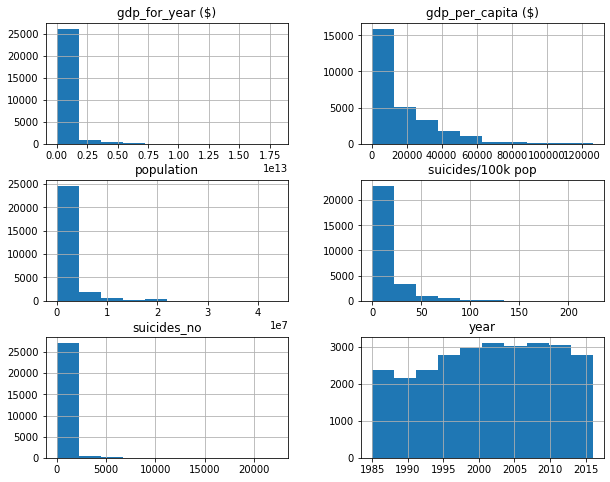

In [10]:
suicide.hist(figsize=[10,8]);

In [ ]:
#there's alot of insight to be gained from visualization especially with this kind of data, do a uni, bi and muti variate exploration 

In [70]:

total_per_sex = pd.DataFrame(suicide.groupby('sex')['suicides_no'].sum())
total_per_sex['proportions'] = total_per_sex['suicides_no'].div(total_per_sex['suicides_no'].sum(), axis=0).multiply(100).round(2)
total_per_sex

,suicides_no,proportions
sex,,
female,1559510,23.11
male,5188910,76.89


In [63]:

max_per_sex = suicide.groupby('sex')['suicides_no'].max()

suicide[((suicide.suicides_no == max_per_sex.get(key='female')) & (suicide.sex == 'female')) | ((suicide.suicides_no == max_per_sex.get(key='male')) & (suicide.sex == 'male'))]\
       [['country', 'year', 'sex', 'suicides_no', 'generation', 'age']]

,country,year,sex,suicides_no,generation,age
20996,Russian Federation,1994,male,22338,Boomers,35-54 years
27213,United States,2015,female,4053,Generation X,35-54 years


In [64]:

max_sex = suicide.merge(max_per_sex, on=['sex', 'suicides_no'], how='right')[['country', 'year', 'sex', 'suicides_no', 'generation', 'age']]
max_sex

,country,year,sex,suicides_no,generation,age
0,United States,2015,female,4053,Generation X,35-54 years
1,Russian Federation,1994,male,22338,Boomers,35-54 years


In [72]:

max_per_age = pd.DataFrame(suicide.groupby('age')['suicides_no'].max())

#
max_age = suicide.merge(max_per_age, on=['age', 'suicides_no'], how='right')[['country', 'year', 'sex', 'suicides_no', 'generation', 'age']]
max_age

,country,year,sex,suicides_no,generation,age
0,Russian Federation,2001,male,6945,Millenials,15-24 years
1,Russian Federation,1994,male,10310,Boomers,25-34 years
2,Russian Federation,1994,male,22338,Boomers,35-54 years
3,Russian Federation,2000,male,404,Millenials,5-14 years
4,Russian Federation,1994,male,11431,Silent,55-74 years
5,United States,2015,male,3171,Silent,75+ years


<AxesSubplot:xlabel='year'>

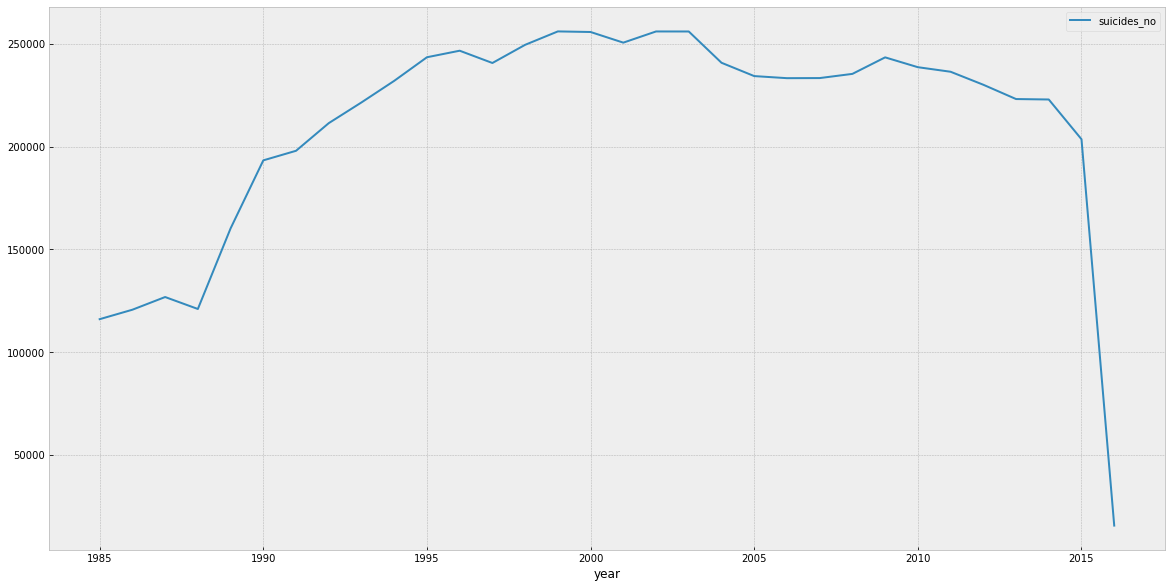

In [78]:
fig,ax = plt.subplots()
plt.style.use('bmh')
fig.set_size_inches([20,10])
total_year = pd.DataFrame(suicide.groupby('year')['suicides_no'].sum())
total_year.plot(kind='line', ax=ax)

In [ ]:
#add a title for your plot and an appropriate ylabel

<AxesSubplot:xlabel='year'>

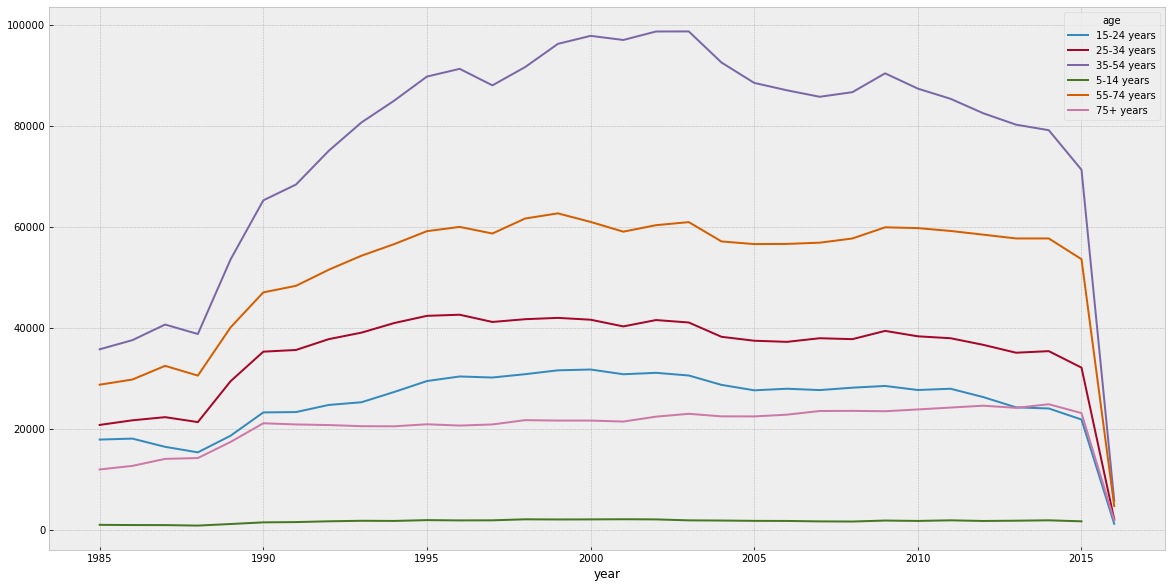

In [84]:
fig,ax = plt.subplots()
plt.style.use('bmh')
fig.set_size_inches([20,10])
total_yea = pd.pivot_table(suicide, index='year', columns='age', values='suicides_no', aggfunc=sum)
total_yea.plot(kind='line', ax=ax)

In [ ]:
#do thesame with this plot; add a title

<AxesSubplot:xlabel='year'>

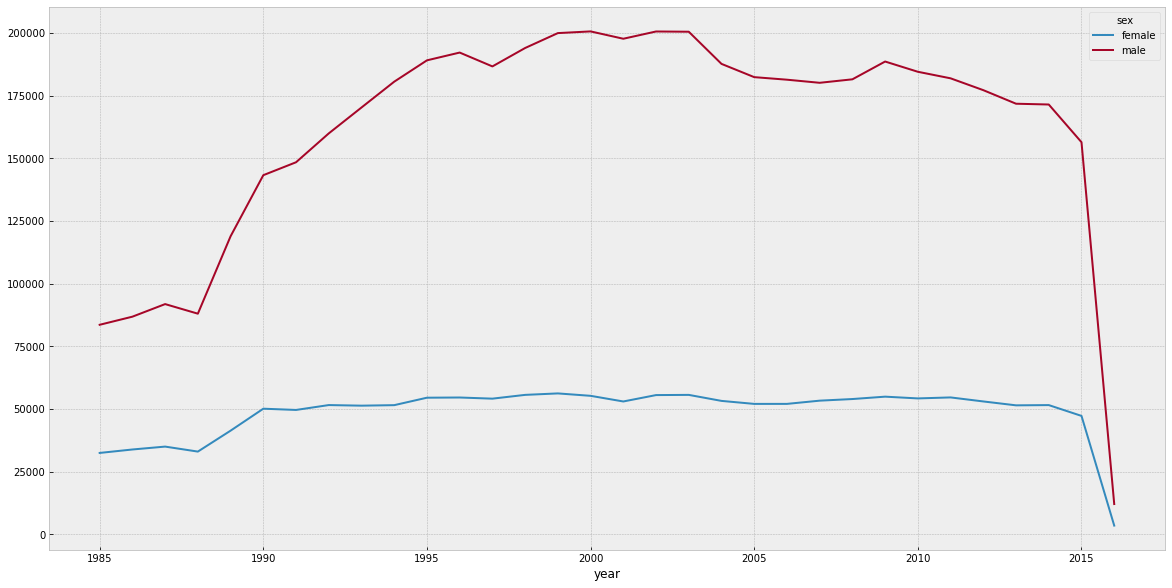

In [85]:
fig,ax = plt.subplots()
plt.style.use('bmh')
fig.set_size_inches([20,10])
total_ye = pd.pivot_table(suicide, index='year', columns='sex', values='suicides_no', aggfunc=sum)
total_ye.plot(kind='line', ax=ax)

In [ ]:
#add a title and a little insight gained from this visualization

In [ ]:
#add comments or markdown cells explaining what you are doing, i struggled trying to figure out your code

In [ ]:
# convert year to a datetime format

In [ ]:
#use functions like describe to get a good overview of the dataset

In [ ]:
#do a proper readme for your analysis explaining your findings